### full: `star_lc_I`

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros
hjd0 = 2460000.0
period = 0.617861  # cámbialo por tu valor
#period = 0.681990

# cargar datos
star_id = '265'
#star_id = '688'

#star_lc_V_path = f'NGC6426/lcs/V_full/lc{star_id}_V.data'
star_lc_I_path = f'NGC6426/lcs/I_full/lc{star_id}_I.data'

#star_lc_V = np.loadtxt(star_lc_V_path, unpack=True)
star_lc_I = np.loadtxt(star_lc_I_path, unpack=True)

ValueError: Wrong number of columns at line 822

### `star_lic_I`: numpy -> pandas 

In [51]:
import pandas as pd
star_lc_I = pd.read_csv(star_lc_I_path, delim_whitespace=True, header=None)

display(star_lc_I.head())
display(star_lc_I.iloc[822-1])

,0,1,2,3,4,5,6,7,8
0,2.460509e+06,-1885.5672,195.0144,-1972.4914,195.4193,0.6100,60.0,2.460509e+06,20.315378
1,2.460509e+06,-2173.3479,266.5155,-2250.2651,267.1721,0.7361,120.0,2.460509e+06,21.000466
2,2.460509e+06,-2472.3791,231.8145,-2561.6269,232.7745,0.7908,120.0,2.460509e+06,20.934520
3,2.460509e+06,-1992.3993,221.7325,-2079.6849,222.7176,0.7476,120.0,2.460509e+06,21.042408
4,2.460509e+06,-2059.6473,203.6203,-2130.7767,204.8649,0.8225,120.0,2.460509e+06,21.026631


0    2.460903e+06
1    3.774903e+03
2    3.038816e+02
3    3.769365e+03
4    3.048557e+02
5    8.447000e-01
6    1.200000e+02
7    2.460903e+06
8             NaN
Name: 821, dtype: float64

### subset donde se encuentra el error: `NGC6426_2508_I/lcs/lc265.data`

In [52]:
set = 'NGC6426_2508_I'
set_id = set[8:] 
reference_fit = f'{set}/ref.fits'
star_lc = f'{set}/lcs/lc{star_id}.data'
#star_lc_full = f'NGC6426/lcs/V_full/lc{star_id}_V.data'
physical_coords_file = f'{set}/phot_{set_id}.data'

# falla a fila 3, empezando desde el 1
# 2460902.648099
df = pd.read_csv(star_lc, delim_whitespace=True, header=None)
print(star_lc, df.shape)
df.head()

NGC6426_2508_I/lcs/lc265.data (112, 6)


,0,1,2,3,4,5
0,2.460903e+06,3055.1190,590.6795,3027.5584,590.8125,0.5322
1,2.460903e+06,3544.1875,390.1226,3536.0463,390.5801,0.7332
2,2.460903e+06,3774.9029,303.8816,3769.3650,304.8557,0.8447
3,2.460903e+06,3833.9960,281.8118,3831.4597,282.8344,0.8573
4,2.460903e+06,4304.4745,268.1563,4326.6322,269.4591,0.8805


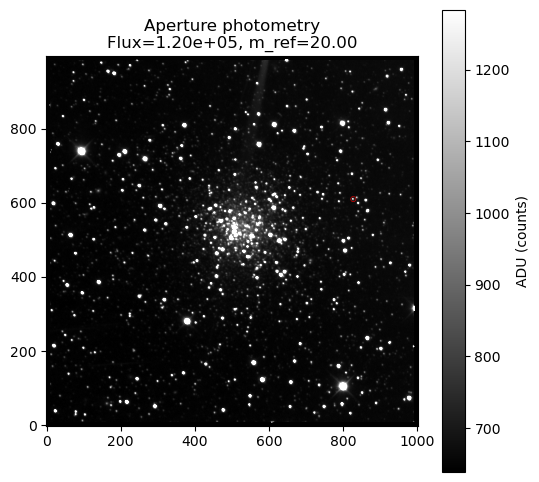

magnitud instrumental de la estrella en ref.fits:
 20.004268872808204 
flujo de la estrella en ref.fits
 119529.11305905509


In [53]:
from to_magnitudes import get_physical_by_id, get_m_ref_new, isis_flux_to_mag_new

delta_flux = df[1].to_numpy(dtype=float)

x_physical, y_physical = get_physical_by_id(physical_coords_file, star_id)

ref_list = pd.read_csv(f'{set}/ref_list', delim_whitespace=True, header=None)
hjd_bjd_exptime = pd.read_csv(f'{set}/hjd_bjd_exptime', delim_whitespace=True, header=None)
ref_metadata = hjd_bjd_exptime[hjd_bjd_exptime[0].isin(ref_list[0])]
# tratamos el exptime de ref.fits como la suma de sus exptimes ?????
ref_exptime = np.sum(ref_metadata[4])

# EXPTIME !!!!!
m_ref, flux_ref = get_m_ref_new(reference_fit, x_physical, y_physical, 
            aperture_radius=7.0, exptime=ref_exptime, display=True)

In [54]:
df

,0,1,2,3,4,5
0,2.460903e+06,3055.1190,590.6795,3027.5584,590.8125,0.5322
1,2.460903e+06,3544.1875,390.1226,3536.0463,390.5801,0.7332
2,2.460903e+06,3774.9029,303.8816,3769.3650,304.8557,0.8447
3,2.460903e+06,3833.9960,281.8118,3831.4597,282.8344,0.8573
4,2.460903e+06,4304.4745,268.1563,4326.6322,269.4591,0.8805
...,...,...,...,...,...,...
107,2.460905e+06,-2412.8710,204.4046,-2871.6462,213.9917,0.7452
108,2.460905e+06,-2550.7042,216.4638,-2879.4035,223.6912,0.7964
109,2.460905e+06,-2207.4198,207.7202,-2578.6020,216.4291,0.7239
110,2.460905e+06,-2280.9682,203.5974,-2650.6319,212.7936,0.7655


In [55]:
ref_list = pd.read_csv(f'{set}/ref_list', delim_whitespace=True, header=None)
hjd_bjd_exptime = pd.read_csv(f'{set}/hjd_bjd_exptime', delim_whitespace=True, header=None)

# renombramos para claridad
df = df.rename(columns={0: "hjd"})
hjd_bjd_exptime = hjd_bjd_exptime.rename(columns={0: "file", 2: "hjd", 3: "bjd", 4: "exptime"})

display(df, hjd_bjd_exptime)

,hjd,1,2,3,4,5
0,2.460903e+06,3055.1190,590.6795,3027.5584,590.8125,0.5322
1,2.460903e+06,3544.1875,390.1226,3536.0463,390.5801,0.7332
2,2.460903e+06,3774.9029,303.8816,3769.3650,304.8557,0.8447
3,2.460903e+06,3833.9960,281.8118,3831.4597,282.8344,0.8573
4,2.460903e+06,4304.4745,268.1563,4326.6322,269.4591,0.8805
...,...,...,...,...,...,...
107,2.460905e+06,-2412.8710,204.4046,-2871.6462,213.9917,0.7452
108,2.460905e+06,-2550.7042,216.4638,-2879.4035,223.6912,0.7964
109,2.460905e+06,-2207.4198,207.7202,-2578.6020,216.4291,0.7239
110,2.460905e+06,-2280.9682,203.5974,-2650.6319,212.7936,0.7655


,file,1,hjd,bjd,exptime
0,202508150001o.fit,I,2.460903e+06,2.460903e+06,100.0
1,202508150003o.fit,I,2.460903e+06,2.460903e+06,120.0
2,202508150005o.fit,I,2.460903e+06,2.460903e+06,120.0
3,202508150007o.fit,I,2.460903e+06,2.460903e+06,120.0
4,202508150009o.fit,I,2.460903e+06,2.460903e+06,120.0
...,...,...,...,...,...
107,202508170356o.fit,I,2.460905e+06,2.460905e+06,120.0
108,202508170358o.fit,I,2.460905e+06,2.460905e+06,120.0
109,202508170360o.fit,I,2.460905e+06,2.460905e+06,120.0
110,202508170362o.fit,I,2.460905e+06,2.460905e+06,120.0


In [56]:
# merge SOLO para agregar 'file'
df = pd.merge_asof(
    df, 
    hjd_bjd_exptime[["file", "hjd", "exptime", "bjd"]],
    on="hjd",
    direction="nearest",
    tolerance=1e-6   # aquí ajustas según el error máximo permitido
).set_index("file")

df = df.rename(columns={"hjd": 0})

print(df.shape)
df.head()

(112, 8)


,0,1,2,3,4,5,exptime,bjd
file,,,,,,,,
202508150001o.fit,2.460903e+06,3055.1190,590.6795,3027.5584,590.8125,0.5322,100.0,2.460903e+06
202508150003o.fit,2.460903e+06,3544.1875,390.1226,3536.0463,390.5801,0.7332,120.0,2.460903e+06
202508150005o.fit,2.460903e+06,3774.9029,303.8816,3769.3650,304.8557,0.8447,120.0,2.460903e+06
202508150007o.fit,2.460903e+06,3833.9960,281.8118,3831.4597,282.8344,0.8573,120.0,2.460903e+06
202508150009o.fit,2.460903e+06,4304.4745,268.1563,4326.6322,269.4591,0.8805,120.0,2.460903e+06


### 🚨 aqui aparece el Missing value:

In [ ]:
from to_magnitudes import isis_flux_to_mag_new

isis_flux_to_mag_new(df[1], m_ref, df['exptime'])

/home/astro/miniconda3/envs/astroconda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


file
202508150001o.fit    22.890288
202508150003o.fit    24.397698
202508150005o.fit          NaN
202508150007o.fit          NaN
202508150009o.fit          NaN
                       ...    
202508170356o.fit    20.722938
202508170358o.fit    20.698935
202508170360o.fit    20.759731
202508170362o.fit    20.746416
202508170364o.fit    20.797169
Length: 112, dtype: float64

desglosemos los contenidos de `isis_flux_to_mag_new`

In [58]:
C0=25

F_ref = 10**((C0 - m_ref) / 2.5)

F_ref

99.60759421587919

In [59]:
delta_flux = df[1].to_numpy(dtype=float)
delta_flux

array([ 3055.119 ,  3544.1875,  3774.9029,  3833.996 ,  4304.4745,
        4309.0792,  4058.9775,  4231.2302,  3686.2307,  4021.8778,
        3767.7513,  3785.982 ,  3787.614 ,  3939.2846,  3679.2379,
        3764.8503,  4074.9085,  3979.8089,  4231.5091,  4078.0744,
        4267.7854,  4325.2251,  4883.745 ,  4766.2553,  5374.4357,
        5024.7283,  4283.2986,  5000.1424,  4622.2595,  4263.7461,
        4193.467 ,  3620.4507,  2609.6487,  1745.4202,   652.7434,
         500.422 ,    -5.8888,  -609.3968, -1617.4584, -1758.8475,
       -2394.5889, -3052.6762, -2999.1681, -3581.119 , -3445.828 ,
       -3473.3858, -2472.5438, -2928.9353, -3053.2228,  1479.9793,
        1765.6608,  1538.074 ,  1624.6284,  2029.9244,  2093.2216,
        1414.0185,  2002.5293,  1703.6468,  1981.317 ,  1924.6048,
        2210.9977,  1927.43  ,  1911.6483,  2110.4361,  2229.2776,
        2144.7413,  2391.0471,  2094.551 ,  2318.0084,  2555.1637,
        2321.39  ,  2569.8615,  2512.2273,  2469.3638,  2939.4

In [61]:
offset = abs(delta_flux.min()) + 10
offset

3653.5586

In [68]:
offset =  abs((F_ref - delta_flux).min()) + 10

offset

5284.82810578412

In [69]:
absolute_flux = F_ref - delta_flux + offset
absolute_flux

array([2329.3167, 1840.2482, 1609.5328, 1550.4397, 1079.9612, 1075.3565,
       1325.4582, 1153.2055, 1698.205 , 1362.5579, 1616.6844, 1598.4537,
       1596.8217, 1445.1511, 1705.1978, 1619.5854, 1309.5272, 1404.6268,
       1152.9266, 1306.3613, 1116.6503, 1059.2106,  500.6907,  618.1804,
         10.    ,  359.7074, 1101.1371,  384.2933,  762.1762, 1120.6896,
       1190.9687, 1763.985 , 2774.787 , 3639.0155, 4731.6923, 4884.0137,
       5390.3245, 5993.8325, 7001.8941, 7143.2832, 7779.0246, 8437.1119,
       8383.6038, 8965.5547, 8830.2637, 8857.8215, 7856.9795, 8313.371 ,
       8437.6585, 3904.4564, 3618.7749, 3846.3617, 3759.8073, 3354.5113,
       3291.2141, 3970.4172, 3381.9064, 3680.7889, 3403.1187, 3459.8309,
       3173.438 , 3457.0057, 3472.7874, 3273.9996, 3155.1581, 3239.6944,
       2993.3886, 3289.8847, 3066.4273, 2829.272 , 3063.0457, 2814.5742,
       2872.2084, 2915.0719, 2444.9951, 2755.627 , 2862.5847, 2237.5153,
       2601.9978, 2633.7128, 2380.5995, 2382.9512, 